In [1]:
import pandas as pd
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./data/data.csv")
data.head()

,date,cpi_us,median_income_us,real_mi_us,per_change_real_mi,dif1_cpi,dif2_cpi
0,1990-01-01,127.5,29943.0,60834.077576,NaN,NaN,NaN
1,1991-01-01,134.7,30126.0,57934.288508,-4.766718,7.2,NaN
2,1992-01-01,138.3,30636.0,57381.471670,-0.954214,3.6,-3.6
3,1993-01-01,142.8,31241.0,56670.692696,-1.238691,4.5,0.9
4,1994-01-01,146.3,32264.0,57126.245851,0.803860,3.5,-1.0


In [3]:
#H0 = Time-series is non-stationary
#H1 = Time-series is stationary

#If the test value is not higher "on abs()" than the crit value, then it is non-stationary, fail to reject the null hypothesis.
#elif the test value is higher "on abs()" than the crit value, then it is stationary, reject the null hypothesis.


result_dif0 = sm.tsa.stattools.adfuller(data.cpi_us)
print(f"Test value: {round(result_dif0[0], 4)} \t Crit value: {round(result_dif0[4]['5%'], 4)}")

result_dif1 = sm.tsa.stattools.adfuller(data.dif1_cpi.dropna())
print(f"Test value: {round(result_dif1[0], 4)} \t Crit value: {round(result_dif1[4]['5%'], 4)}")

result_dif2 = sm.tsa.stattools.adfuller(data.dif2_cpi.dropna())
print(f"Test value: {round(result_dif2[0], 4)} \t Crit value: {round(result_dif2[4]['5%'], 4)}")

#So we can suggest that CPI is I(1)

Test value: -0.2397 	 Crit value: -2.9641
Test value: -6.6362 	 Crit value: -2.9679
Test value: -11.0696 	 Crit value: -2.972


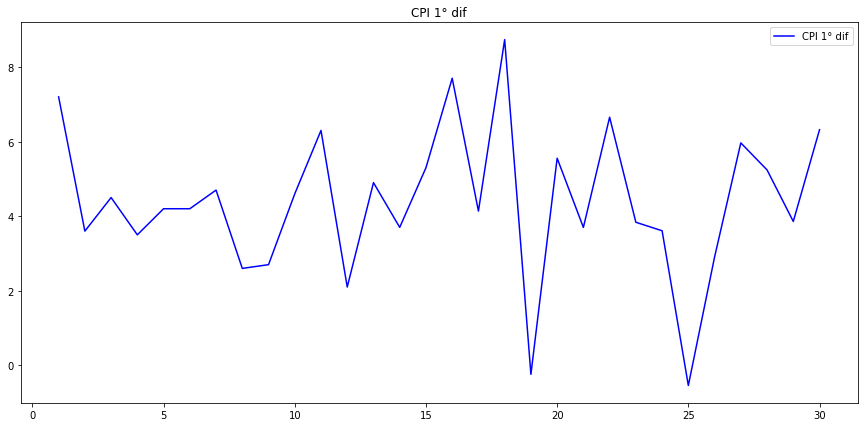

In [4]:
#reploting it

plt.figure(figsize=(15,7))
plt.plot(data["dif1_cpi"], color = 'blue', label = 'CPI 1° dif')
plt.legend(loc = 'best')
plt.title('CPI 1° dif')
plt.show()

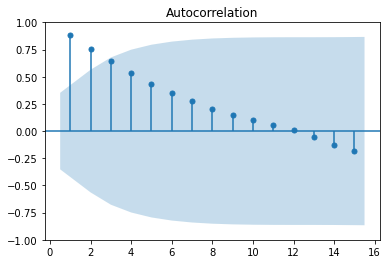

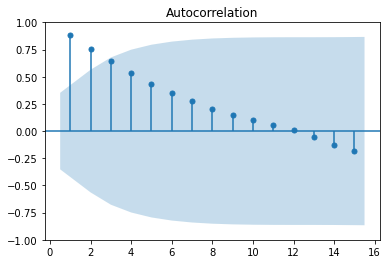

In [24]:
# 1st Differencing
plot_acf(data.median_income_us.dropna(), zero=False)

C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


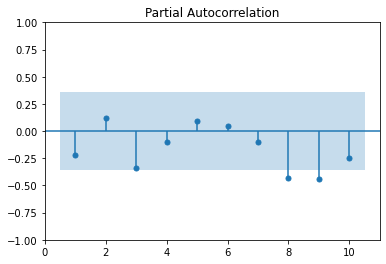

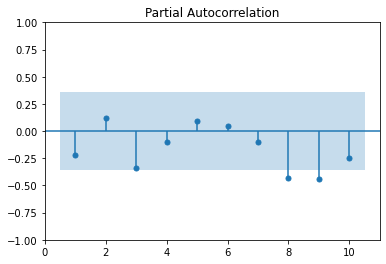

In [16]:
# 1st Differencing
plot_pacf(data.dif1_cpi.dropna(), lags=10,zero=False)